Load the Kaggle dataset on UCLA graduate program admissions (https://www.kaggle.com/datasets/mohansacharya/graduate-admissions) into this Colab

In [1]:
# Uncomment only if running within Google Colab
#from google.colab import files
#files.upload()

Loading the dataset and performing a Partial Least Squares (PLS)

/usr/local/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:93: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:325: RuntimeWarning: invalid value encountered in true_divide
  x_loadings = np.dot(x_scores, Xk) / np.dot(x_scores, x_scores)
/usr/local/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:334: RuntimeWarning: invalid value encountered in true_divide
  y_loadings = np.dot(x_scores, Yk) / np.dot(x_scores, x_scores)
/usr/local/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:93: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/usr/local/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:325: RuntimeWarning: invalid value encountered in true_divide
  x_loadings = np.dot(x_scores, Xk) / np.dot(x_scores, x_sc

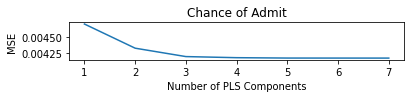

RMSE test: 0.07126042855029235


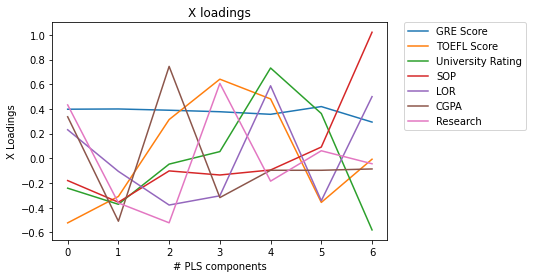

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from pca import pca
from sklearn.metrics import mean_squared_error

#read in data
data_full = pd.read_csv("Admission_Predict.csv")

#select subset of data
data = data_full[["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA","Research","Chance of Admit "]]

#define predictor and response variables
X = data[["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA", "Research"]]
y = data[["Chance of Admit "]]

## PLS
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

fig = plt.figure()
# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 8):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
fig.add_subplot(5, 1, 1)
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('Chance of Admit')
plt.show()


#split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

#calculate RMSE
pls = PLSRegression(n_components=7)
pls.fit(scale(X_train), y_train)
print("RMSE test:",np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test)))))

fig.add_subplot(5, 1, 2)
plt.plot(pls.x_loadings_)
plt.ylabel('X Loadings')
plt.xlabel('# PLS components')
plt.title('X loadings')
plt.legend(labels=["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA", "Research"],
           bbox_to_anchor=(1.05, 1),
          loc='upper left', borderaxespad=0.)
plt.show()

Pairwise plot of the dataset: 7-dimensional complex data to visualize

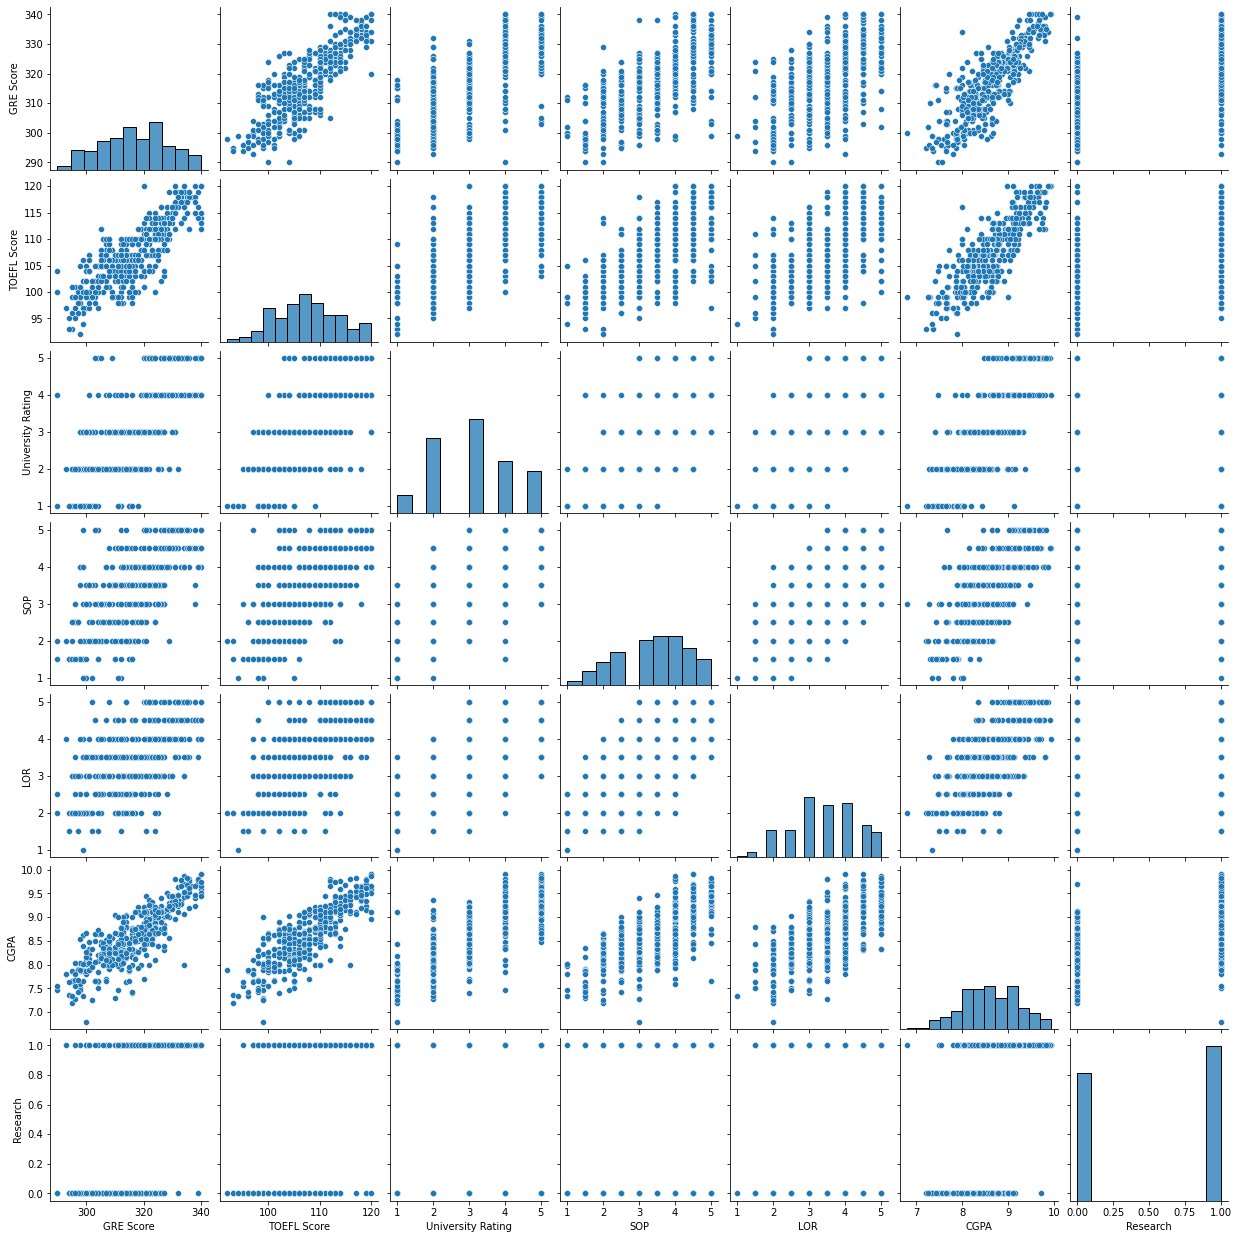

In [3]:
## Pairwise plot
import seaborn as sns
sns.pairplot(X)




Principal Component Analysis (PCA)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


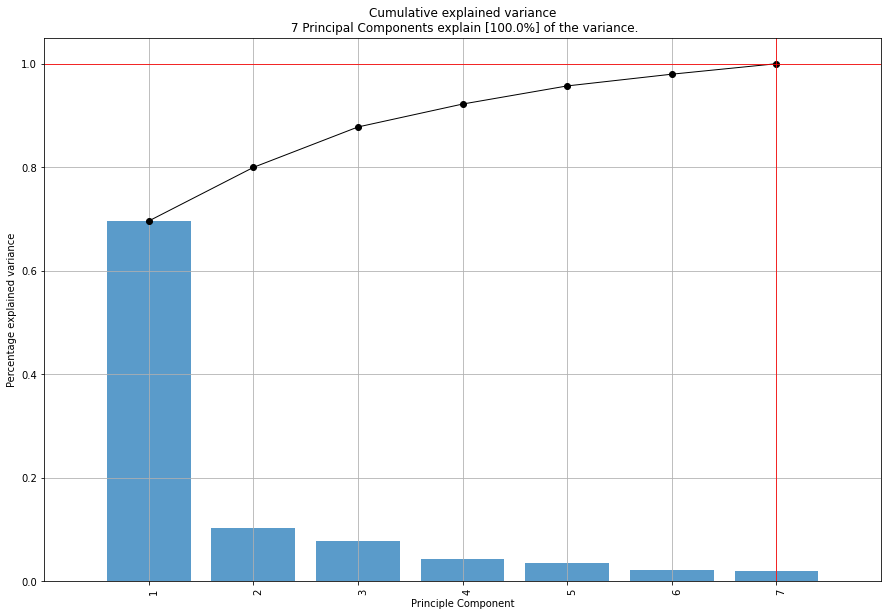

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 432x288 with 0 Axes>

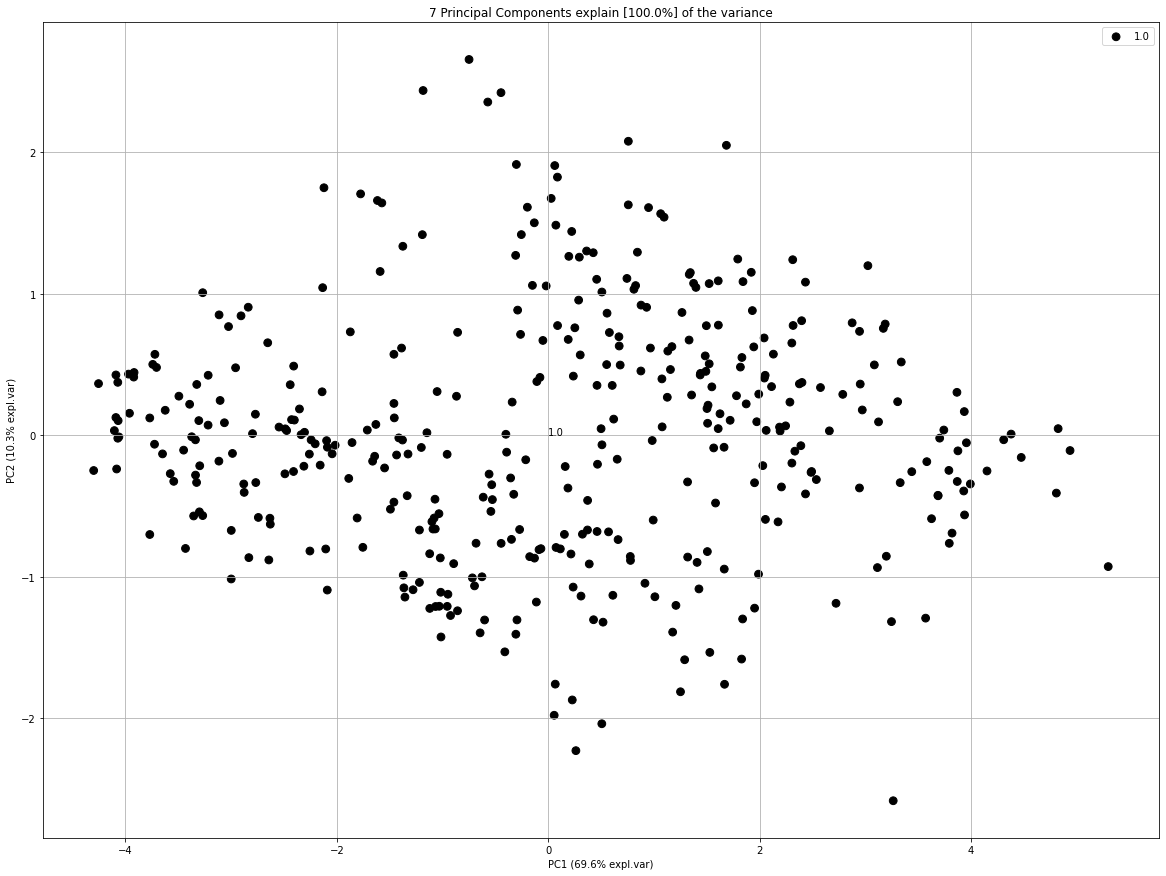

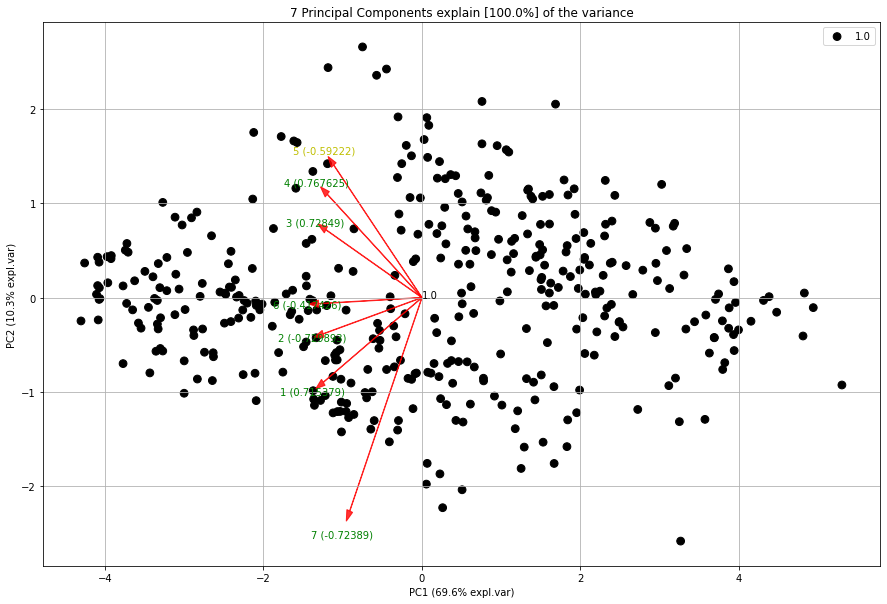

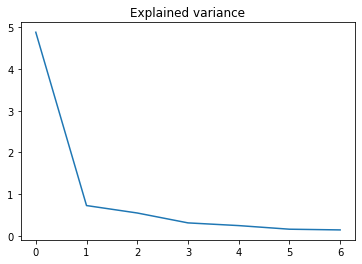

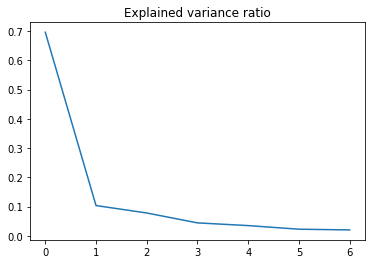

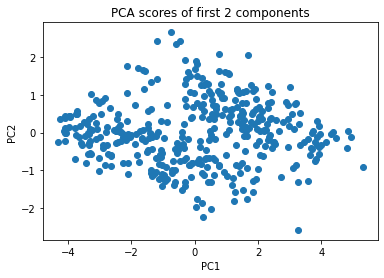

Singular values: [44.14982525 17.02795751 14.78772058 11.13381056  9.90374705  7.96549025
  7.52794363]


In [3]:
## PCA
scaled_X = scale(X)

# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
#model = pca(n_components=0.95)

# Or reduce the data towards 2 PCs
model = pca(n_components=7)

# Fit transform
results = model.fit_transform(scaled_X)

# Plot explained variance
fig, ax = model.plot()

# Scatter first 2 PCs
fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=7)

# Same as before, but the score and explained variance plots are simpler
scaled_X = scale(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
pca = PCA(n_components=7)
pca.fit(scaled_X)

#print("Explained variance:", pca.explained_variance_)
fig.add_subplot(5, 1, 3)
plt.title('Explained variance')
plt.plot(pca.explained_variance_)
plt.show()

#print("Explained variance ratio:", pca.explained_variance_ratio_)
fig.add_subplot(5, 1, 4)
plt.title('Explained variance ratio')
plt.plot(pca.explained_variance_ratio_)
plt.show()

Xtransformed = pca.transform(scaled_X)
#print("Xtransformed:", Xtransformed)
fig.add_subplot(5, 1, 5)
plt.scatter(Xtransformed[:,0], Xtransformed[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA scores of first 2 components")
plt.show()

print("Singular values:", pca.singular_values_)
#print("Feature names",pca.feature_names_in_)


K-means clustering of the first 2 components of our PCA

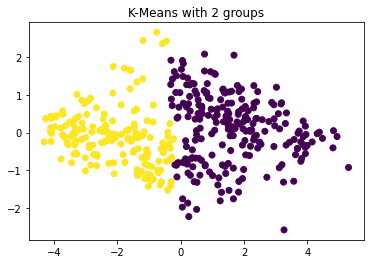

In [4]:
## K-means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(Xtransformed)

fig = plt.figure()
fig.add_subplot(1, 1, 1)
plt.scatter(Xtransformed[:,0], Xtransformed[:,1], c=kmeans)
plt.title('K-Means with 2 groups')
plt.show()

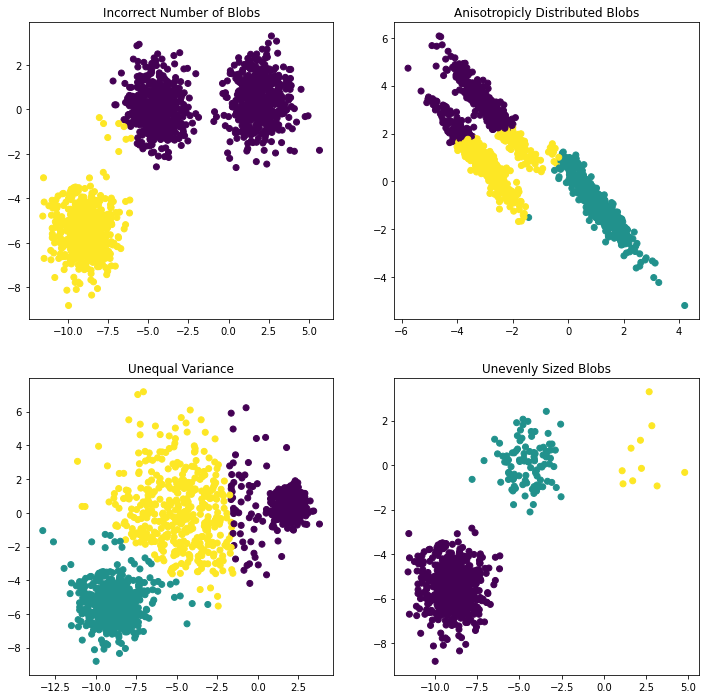

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()